In [59]:
import pandas as pd 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns 
import matplotlib.pyplot as  plt 

In [60]:
# reading data from text file 
with open('SMSSpamCollection.txt','r') as file: 
    data = file.read()

In [61]:
temp = data.split('\n')

In [62]:
print("No. of emails : ",len(temp) )

No. of emails :  5575


In [63]:
x = [] 
y = [] 
for email_with_label in temp: 
    temp_emails = email_with_label.split('\t') 
    if len(temp_emails) == 2 : 
        x.append(temp_emails[1])
        y.append(temp_emails[0])
        
    

In [64]:
len(x),len(y)

(5574, 5574)

In [65]:
# dataframe
dt = {'email_message':x,"label":y}
email_data = pd.DataFrame(dt)
email_data.head()

,email_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [66]:
# #alternative way 
# df2 = pd.read_table('SMSSpamCollection.txt',header=None)
# df2.columns = ['label','email_message']
# df2.head()


In [67]:
email_data['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [68]:
spam = email_data[email_data['label']=='spam']
ham = email_data[email_data['label']=='ham']

In [69]:
spam.shape 

(747, 2)

In [70]:
ham.shape 

(4827, 2)

In [71]:
ham = ham.sample(1000)   ## randomly 100 records 

In [72]:
spam.shape , ham.shape 

((747, 2), (1000, 2))

In [73]:
final_df=pd.concat([ham,spam],axis=0)

In [74]:
final_df.head()

,email_message,label
1772,Watching tv now. I got new job :),ham
5396,I dont know exactly could you ask chechi.,ham
2939,Hey i've booked the pilates and yoga lesson al...,ham
4792,Send me your resume:-),ham
4966,"A few people are at the game, I'm at the mall ...",ham


In [75]:
final_df.shape

(1747, 2)

In [76]:
### Text cleaning  
import re   # regular expression 

In [77]:
# index reassigning 
final_df.reset_index(drop=True,inplace=True)

In [78]:
final_df['email_message'][25]
# a-z , A-z 

'Cool breeze... Bright sun... Fresh flower... Twittering birds... All these waiting to wish u: "GOODMORNING &amp; HAVE A NICE DAY" :)'

In [79]:
for i in range(len(final_df)): 
    final_df['email_message'][i] = re.sub('[^a-zA-Z ]','',final_df['email_message'][i]).lower()


C:\Users\pawan\AppData\Local\Temp\ipykernel_15140\488455171.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  final_df['email_message'][i] = re.sub('[^a-zA-Z ]','',final_df['email_message'][i]).lower()


In [80]:
final_df.head()

,email_message,label
0,watching tv now i got new job,ham
1,i dont know exactly could you ask chechi,ham
2,hey ive booked the pilates and yoga lesson alr...,ham
3,send me your resume,ham
4,a few people are at the game im at the mall wi...,ham


In [81]:
## alphabet -->  label map() 
# spam = 1 
# ham = 0  

labels = list(final_df['label'])
temp_labels = [1 if item =="spam" else 0 for item in labels]
final_df['label'] = temp_labels


In [82]:
final_df.head()

,email_message,label
0,watching tv now i got new job,0
1,i dont know exactly could you ask chechi,0
2,hey ive booked the pilates and yoga lesson alr...,0
3,send me your resume,0
4,a few people are at the game im at the mall wi...,0


<!-- ## independent and dependent x and y variable   -->

In [83]:
x = final_df['email_message']
y = final_df['label']

In [84]:
x = x.values

In [85]:
 bow_obj = CountVectorizer(max_features=1500,stop_words='english')

In [86]:
X =  bow_obj.fit_transform(x)

In [87]:
X 

<1747x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 12791 stored elements in Compressed Sparse Row format>

In [88]:
X = X.toarray()

In [89]:
X 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
y 

0       0
1       0
2       0
3       0
4       0
       ..
1742    1
1743    1
1744    1
1745    1
1746    1
Name: label, Length: 1747, dtype: int64

In [91]:
X.shape , y.shape 

((1747, 1500), (1747,))

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# training and testing splitting 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

In [94]:
x_train.shape 

(1484, 1500)

In [95]:
# algorithms to perform classification task 
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 

In [96]:
## object creation 
bnb = BernoulliNB()
GNb = GaussianNB() 
mnb = MultinomialNB()

In [97]:
## training algorithms
bnb.fit(x_train,y_train)
print("BernoulliNB Trained")
mnb.fit(x_train,y_train)
print("MultinomialNB Trained")
GNb.fit(x_train,y_train)
print('GaussianNB training!')


BernoulliNB Trained
MultinomialNB Trained
GaussianNB training!


In [98]:
print("MultinomialNB Training score : ",mnb.score(x_train,y_train))
print("MultinomialNB Testing score : ",mnb.score(x_test,y_test))
print()
print("BernoulliNB Training score : ",bnb.score(x_train,y_train))
print("BernoulliNB Testing score : ",bnb.score(x_test,y_test))
print()
print("GaussianNB Training score : ",GNb.score(x_train,y_train))
print("GaussianNB Testing score : ",GNb.score(x_test,y_test))



MultinomialNB Training score :  0.9683288409703504
MultinomialNB Testing score :  0.9315589353612167

BernoulliNB Training score :  0.9629380053908356
BernoulliNB Testing score :  0.9391634980988594

GaussianNB Training score :  0.9831536388140162
GaussianNB Testing score :  0.9125475285171103


In [99]:
## Prediction  


In [100]:
x_test.shape 

(263, 1500)

In [101]:
prediction = mnb.predict(x_test)

In [102]:
y_test 

1607    1
171     0
1300    1
1346    1
895     0
       ..
1333    1
245     0
1114    1
643     0
392     0
Name: label, Length: 263, dtype: int64

In [103]:
prediction

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [104]:
pred = list(prediction)
actual = list(y_test)

comparison_df = pd.DataFrame({"Actual":actual,'Prediction':pred})
comparison_df.head()

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [105]:
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
matrix = confusion_matrix(comparison_df['Actual'] , comparison_df['Prediction'])
matrix

array([[138,   6],
       [ 12, 107]], dtype=int64)

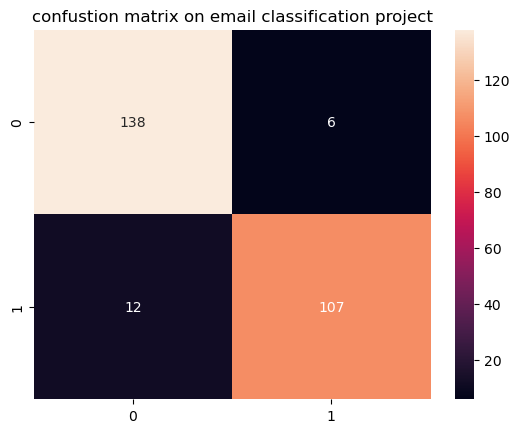

In [107]:
sns.heatmap(matrix,annot=True,fmt='d') 
plt.title('confustion matrix on email classification project')
plt.show()

In [108]:
print(classification_report(comparison_df['Actual'] , comparison_df['Prediction']))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       144
           1       0.95      0.90      0.92       119

    accuracy                           0.93       263
   macro avg       0.93      0.93      0.93       263
weighted avg       0.93      0.93      0.93       263



In [109]:
### savings our models or algorithms 

In [110]:
import os,joblib

In [111]:
os.makedirs('models',exist_ok=True)

In [112]:
##
joblib.dump(bnb,"./models/bernouliNB.lb")
joblib.dump(GNb,"./models/gasussianNB.lb")
joblib.dump(mnb,"./models/multinomialNB.lb")


['./models/multinomialNB.lb']

In [113]:
## bow_obj 
joblib.dump(bow_obj,'./models/bag_of_words.lb')

['./models/bag_of_words.lb']